In [ ]:
!pip install fastai==1.0.52
from fastai.text import *

## Preparing the data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
pt=path/'Thesis Data'/'full doc csv'
dt=path/'Thesis Data'/'Our dataset'

In [0]:
bs=32

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(pt, 'full_doc.csv', bs=bs)
data_lm.save('full_doc_data_lm.pkl')

In [0]:
data_lm = load_data(pt, 'full_doc_data_lm.pkl',bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [0]:
# Language model data AA
data_lm_AA = TextLMDataBunch.from_csv(dt, 'OurDataset_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_lm_AA.save('train_AA_data_lm.pkl')

In [0]:
data_lm_AA = load_data(dt, 'train_AA_data_lm.pkl',bs=bs)

In [0]:
# Classifier model data AA
data_clas = TextClasDataBunch.from_csv(dt, 'OurDataset_train.csv', vocab=data_lm.train_ds.vocab, bs=bs)
data_clas.save('AA_data_clas.pkl')

In [0]:
data_clas = load_data(dt, 'AA_data_clas.pkl', bs=bs)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## LM Start

### step 1

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(pt/'models'/'word_news_lm_30');

In [0]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60004, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60004, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60004, bias=True)
    (output_dp): RNNDropout()
  )
)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.style.use('seaborn-white')

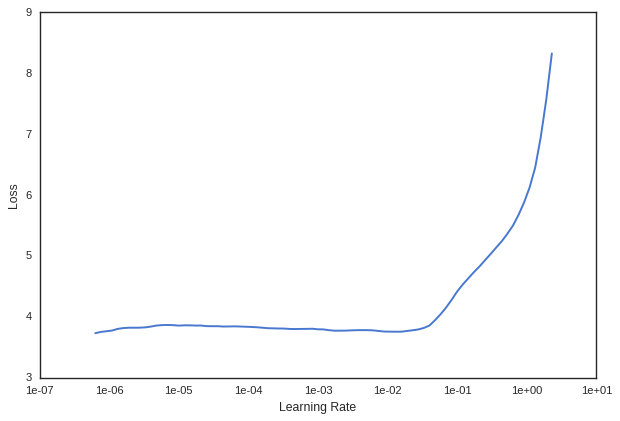

In [0]:
learn.recorder.plot()
plt.savefig('clr_AAlm.eps')

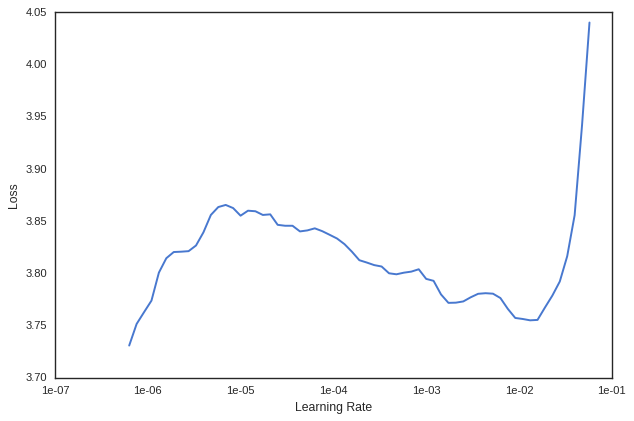

In [0]:
learn.recorder.plot(skip_end=25)
plt.savefig('clr_skipend_AAlm.eps')

In [0]:
learn.freeze()
for name, param in learn.model.named_parameters():
    if param.requires_grad:
        print (name)

print('-------------')
learn.freeze_to(-2)
for name, param in learn.model.named_parameters():
    if param.requires_grad:
        print (name)

print('-------------')
learn.freeze_to(-3)
for name, param in learn.model.named_parameters():
    if param.requires_grad:
        print (name)

print('-------------')
learn.unfreeze()
for name, param in learn.model.named_parameters():
    if param.requires_grad:
        print (name)

print('-------------')

0.encoder.weight
1.decoder.bias
-------------
0.encoder.weight
0.rnns.2.weight_hh_l0_raw
0.rnns.2.module.weight_ih_l0
0.rnns.2.module.bias_ih_l0
0.rnns.2.module.bias_hh_l0
1.decoder.bias
-------------
0.encoder.weight
0.rnns.1.weight_hh_l0_raw
0.rnns.1.module.weight_ih_l0
0.rnns.1.module.bias_ih_l0
0.rnns.1.module.bias_hh_l0
0.rnns.2.weight_hh_l0_raw
0.rnns.2.module.weight_ih_l0
0.rnns.2.module.bias_ih_l0
0.rnns.2.module.bias_hh_l0
1.decoder.bias
-------------
0.encoder.weight
0.rnns.0.weight_hh_l0_raw
0.rnns.0.module.weight_ih_l0
0.rnns.0.module.bias_ih_l0
0.rnns.0.module.bias_hh_l0
0.rnns.1.weight_hh_l0_raw
0.rnns.1.module.weight_ih_l0
0.rnns.1.module.bias_ih_l0
0.rnns.1.module.bias_hh_l0
0.rnns.2.weight_hh_l0_raw
0.rnns.2.module.weight_ih_l0
0.rnns.2.module.bias_ih_l0
0.rnns.2.module.bias_hh_l0
1.decoder.bias
-------------


In [0]:
learn.freeze()

In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_head');

epoch,train_loss,valid_loss,accuracy,time
0,5.027077,4.885716,0.251487,40:09


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_head_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.870759,4.813776,0.254289,40:04


In [0]:
learn.load('AA_lm_head_2');
learn.freeze_to(-2);
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_1');

epoch,train_loss,valid_loss,accuracy,time
0,4.758917,4.674964,0.264705,41:05


In [0]:
learn.load('AA_lm_body_1');
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_2');

epoch,train_loss,valid_loss,accuracy,time
0,4.688381,4.627882,0.267934,41:05


In [0]:
learn.freeze_to(-3);
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_3');

epoch,train_loss,valid_loss,accuracy,time
0,4.568065,4.518000,0.277727,43:09


In [0]:
learn.load('AA_lm_body_3');
learn.freeze_to(-3);
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_4');

epoch,train_loss,valid_loss,accuracy,time
0,4.462990,4.469208,0.281906,42:11


In [0]:
learn.unfreeze();
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_5');

epoch,train_loss,valid_loss,accuracy,time
0,4.429181,4.420653,0.286092,43:17


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_6');

epoch,train_loss,valid_loss,accuracy,time
0,4.336467,4.389041,0.288601,42:59


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_7');

epoch,train_loss,valid_loss,accuracy,time
0,4.343630,4.368066,0.290485,42:57


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_8');

epoch,train_loss,valid_loss,accuracy,time
0,4.292164,4.353245,0.291817,42:57


In [0]:
learn.unfreeze();
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_9'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.288127,4.343508,0.292770,42:57


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_10'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.202466,4.333976,0.293511,42:56


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_11'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.177612,4.327095,0.294153,42:58


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_12'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.148976,4.322577,0.294328,42:56


In [0]:
learn.unfreeze()
learn.load('AA_lm_body_12'); 
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_13'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.115949,4.320917,0.294690,43:07


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_14'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.121187,4.317613,0.294988,43:07


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_15');

epoch,train_loss,valid_loss,accuracy,time
0,4.152582,4.314929,0.295125,43:07


In [0]:
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_16'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.101023,4.313452,0.295319,43:08


In [0]:
learn.unfreeze()
learn.load('AA_lm_body_16'); 
learn.fit_one_cycle(1, 1e-3)
learn.save('AA_lm_body_17'); 

epoch,train_loss,valid_loss,accuracy,time
0,4.055392,4.313069,0.295345,46:19


In [0]:
learn.save_encoder('AA_lm_enc')

### Classifier

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [0]:
learn_cls.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60004, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(60004, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1150, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1150, 1150, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1150, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=

In [0]:
learn_cls.load_encoder('AA_lm_enc')

In [0]:
learn_cls.freeze()

In [0]:
learn_cls.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


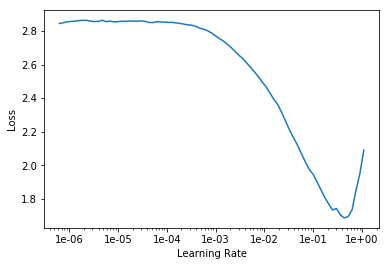

In [0]:
learn_cls.recorder.plot(skip_end=7)

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.062488,0.031442,0.993391,10:50
1,0.027254,0.023841,0.995130,10:52


In [0]:
learn_cls.save('cls')

In [0]:
learn_cls.load('cls')
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.051568,0.035320,0.993043,12:41
1,0.016872,0.034106,0.996522,12:40


In [0]:
learn_cls.save('cls_2')

In [0]:
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn_cls.save('cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.048560,0.028023,0.995130,18:39
1,0.008953,0.023848,0.996174,18:40


In [0]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.006428,0.027019,0.996522,24:23
1,0.004685,0.022871,0.997217,24:10


In [0]:
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('cls_5')

epoch,train_loss,valid_loss,accuracy,time
0,0.002216,0.022911,0.997217,24:16
1,0.003271,0.020250,0.997565,24:16


In [0]:
learn_cls.load('cls_5')
learn_cls.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('cls_6')

epoch,train_loss,valid_loss,accuracy,time
0,0.006042,0.026174,0.997217,25:16
1,0.004600,0.024722,0.997217,25:23


In [0]:
learn_cls.load('cls_5');

### Testing

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds, targets

In [0]:
pred,targ = testing(dt/'OurDataset_test.csv')

3592
Accuracy: 
0.9958240534521158
[('shordindu', 'robindronath'), ('humayun_ahmed', 'MZI'), ('shordindu', 'shirshendu'), ('manik_bandhopaddhay', 'shordindu'), ('shordindu', 'bongkim'), ('bongkim', 'shordindu'), ('manik_bandhopaddhay', 'shirshendu'), ('shordindu', 'robindronath'), ('shordindu', 'robindronath'), ('shordindu', 'bongkim'), ('shomresh', 'humayun_ahmed'), ('robindronath', 'shordindu'), ('shunil_gongopaddhay', 'humayun_ahmed'), ('manik_bandhopaddhay', 'tarashonkor'), ('robindronath', 'shordindu')]


In [0]:
from sklearn.metrics import f1_score
out = f1_score(targ, pred, average='weighted')
out

0.9958144212313705

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(targ, pred)
print(cm)

[[220   0   0   0 ...   0   0   0   0]
 [  0 111   0   0 ...   0   0   0   0]
 [  1   0 905   0 ...   0   0   0   0]
 [  0   0   0  90 ...   0   1   0   0]
 ...
 [  0   0   1   0 ... 392   0   0   0]
 [  0   0   0   0 ...   0 155   0   0]
 [  0   0   0   0 ...   0   0 186   0]
 [  0   0   0   0 ...   0   0   0  37]]


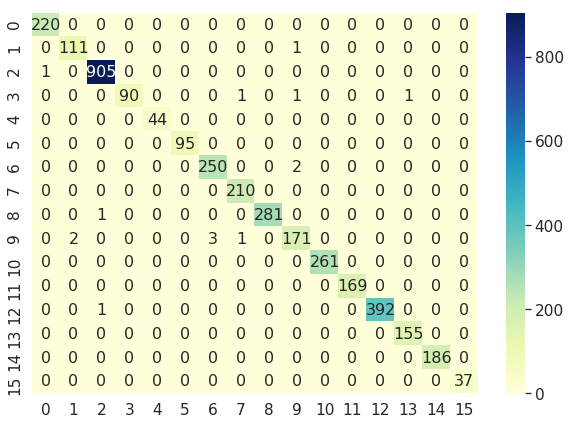

In [0]:
import seaborn as sn

df_cm = pd.DataFrame(cm, range(16),range(16))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',cmap="YlGnBu")# font size

import matplotlib.pyplot as plt
plt.savefig('news_word_AA.eps')

In [0]:
from google.colab import files
files.download('news_word_AA.eps')